In [208]:
import pandas as pd
import numpy as np
import seaborn as sns

In [209]:
medical_df = pd.read_csv('./medical_examination.csv')

In [210]:
medical_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [211]:
weight_s = medical_df['weight']
height_s = medical_df['height']
#medical_df['BMI']=((medical_df.loc[:, 'weight']) / (medical_df.loc[:, 'height'] / 100)**2)
medical_df['overweight'] = [1 if (x/((y/100)**2)) > 25 else 0 for x,y in zip(medical_df.weight, medical_df.height)]

In [212]:
medical_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [213]:
medical_df['cholesterol'] = [0 if x == 1 else 1 for x in medical_df.cholesterol]
medical_df['gluc'] = [0 if x == 1 else 1 for x in medical_df.gluc]

In [214]:
medical_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [215]:
df_cat = medical_df.melt(id_vars='cardio', value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [216]:
df_cat.head(10)

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
5,0,cholesterol,1
6,0,cholesterol,1
7,1,cholesterol,1
8,0,cholesterol,0
9,0,cholesterol,0


In [217]:
df_cat.groupby('cardio')

In [218]:
data_dict = {
    f"cardio_{cardio}": data.groupby(["variable", "value"]).size().reset_index(name='counts')
    for cardio, data in df_cat.groupby("cardio")
}

In [219]:
df_cat.value_counts()


cardio  variable     value
1       alco         0        33156
0       alco         0        33080
1       smoke        0        32050
0       smoke        0        31781
        gluc         0        30894
        cholesterol  0        29330
        active       1        28643
1       gluc         0        28585
        active       1        27618
        overweight   1        24440
        cholesterol  0        23055
0       overweight   1        19106
                     0        15915
1       cholesterol  1        11924
        overweight   0        10539
        active       0         7361
        gluc         1         6394
0       active       0         6378
        cholesterol  1         5691
        gluc         1         4127
        smoke        1         3240
1       smoke        1         2929
0       alco         1         1941
1       alco         1         1823
dtype: int64

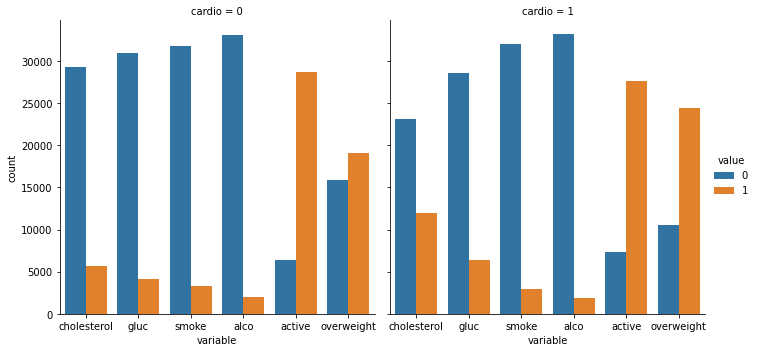

In [220]:
sns.catplot(data=df_cat, x='variable', hue='value', col='cardio', kind='count')

In [221]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [222]:
medical_df = medical_df.drop(medical_df[medical_df.ap_hi < medical_df.ap_lo].index)

In [223]:
medical_df = medical_df.drop(medical_df[medical_df.height <= medical_df.height.quantile(0.025)].index)

In [224]:
medical_df = medical_df.drop(medical_df[medical_df.height >= medical_df.height.quantile(0.975)].index)

In [225]:
medical_df = medical_df.drop(medical_df[medical_df.weight <= medical_df.weight.quantile(0.025)].index)

In [226]:
medical_df = medical_df.drop(medical_df[medical_df.weight >= medical_df.weight.quantile(0.975)].index)

In [227]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60507 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60507 non-null  int64  
 1   age          60507 non-null  int64  
 2   gender       60507 non-null  int64  
 3   height       60507 non-null  int64  
 4   weight       60507 non-null  float64
 5   ap_hi        60507 non-null  int64  
 6   ap_lo        60507 non-null  int64  
 7   cholesterol  60507 non-null  int64  
 8   gluc         60507 non-null  int64  
 9   smoke        60507 non-null  int64  
 10  alco         60507 non-null  int64  
 11  active       60507 non-null  int64  
 12  cardio       60507 non-null  int64  
 13  overweight   60507 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 6.9 MB


In [244]:
corr_mat = medical_df.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = 1

In [245]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [238]:
corr_mat = corr_mat.round(decimals=1)
corr_mat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
gender,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.2,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.2
weight,0.0,0.1,0.1,0.2,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.1,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.1,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


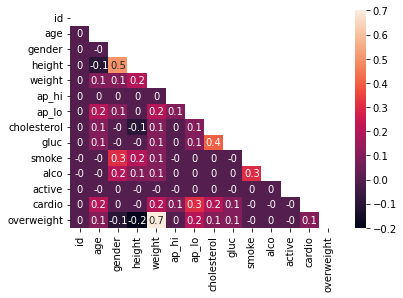

In [239]:
plot = sns.heatmap(corr_mat, mask=mask, annot=True)